In [2]:
import requests
import json
import pandas as pd

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.processing import HistoricalPrice, RandomVariable
from utils.yield_spread import get_us_yield
from hmmlearn import hmm

In [3]:
yield_df = get_us_yield()
yield_df.head()

,value
date,
2000-07-01,-0.09
2000-08-01,-0.45
2000-09-01,-0.38
2000-10-01,-0.55
2000-11-01,-0.64


In [4]:
hp = HistoricalPrice()
vn = hp.get_asset_price('VNINDEX','monthly').iloc[:-1]
vn['us_yield_spread'] = yield_df['value'].values
print(vn.shape)
vn.head(2),vn.tail(2)

(280, 10)


(               low    high    open   close  adj_close  order_matching_volume  \
 date                                                                           
 2000-07-31  101.55  101.55  101.55  101.55     101.55                  14500   
 2000-08-31  115.15  115.15  115.15  115.15     115.15                 558100   
 
             order_matching_value  order_negotiated_volume  \
 date                                                        
 2000-07-31          2.472900e+08                        0   
 2000-08-31          1.087611e+10                        0   
 
             order_negotiated_value  us_yield_spread  
 date                                                 
 2000-07-31                       0            -0.09  
 2000-08-31                       0            -0.45  ,
                 low     high     open    close  adj_close  \
 date                                                        
 2023-09-30  1152.45  1163.88  1157.76  1154.15    1154.15   
 2023-10-31  1025

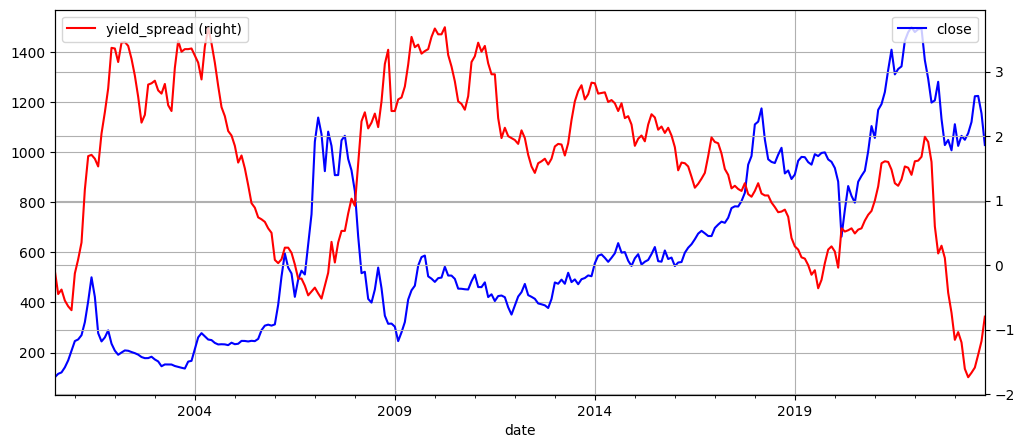

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.xlabel('Month')

ax1 = vn['adj_close'].plot(color='blue', grid=True, label='close')
ax2 = vn['us_yield_spread'].plot(color='red', grid=True, secondary_y=True, label='yield_spread')
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.show()

In [20]:
best_mle = -100000
best_model = None
for i in range(100):
    try:
        model = hmm.GMMHMM(n_components=2,n_iter=10000)
        model.fit(vn['us_yield_spread '])
        mle = model.score(vn['us_yield_spread'])
        if mle>best_mle:
            best_mle = mle
            best_model = model
    except Exception:
        continue
vn['states'] = best_model.predict(vn['us_yield_spread'])

AttributeError: 'NoneType' object has no attribute 'predict'

In [17]:
def plot_cluster(df: pd.DataFrame, start_date: str = "01-01-2000", end_date: str = "01-01-2030") -> None:
    temp = df.loc[start_date:end_date,:]
    plt.figure(figsize=(15, 10))
    df_1 = temp.loc[temp['states']==0,'close']
    df_2 = temp.loc[temp['states']==1,'close']

    df_1.index = df_1.index#.to_timestamp()
    df_1 = df_1.sort_index()
    df_2.index = df_2.index#.to_timestamp()
    df_2 = df_2.sort_index()

    plt.scatter(df_1.index, df_1, color='blue')
    plt.scatter(df_2.index, df_2, color='red' )
    plt.title("Price series")
    plt.ylabel("Price ($)")
    plt.xlabel("Date")
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


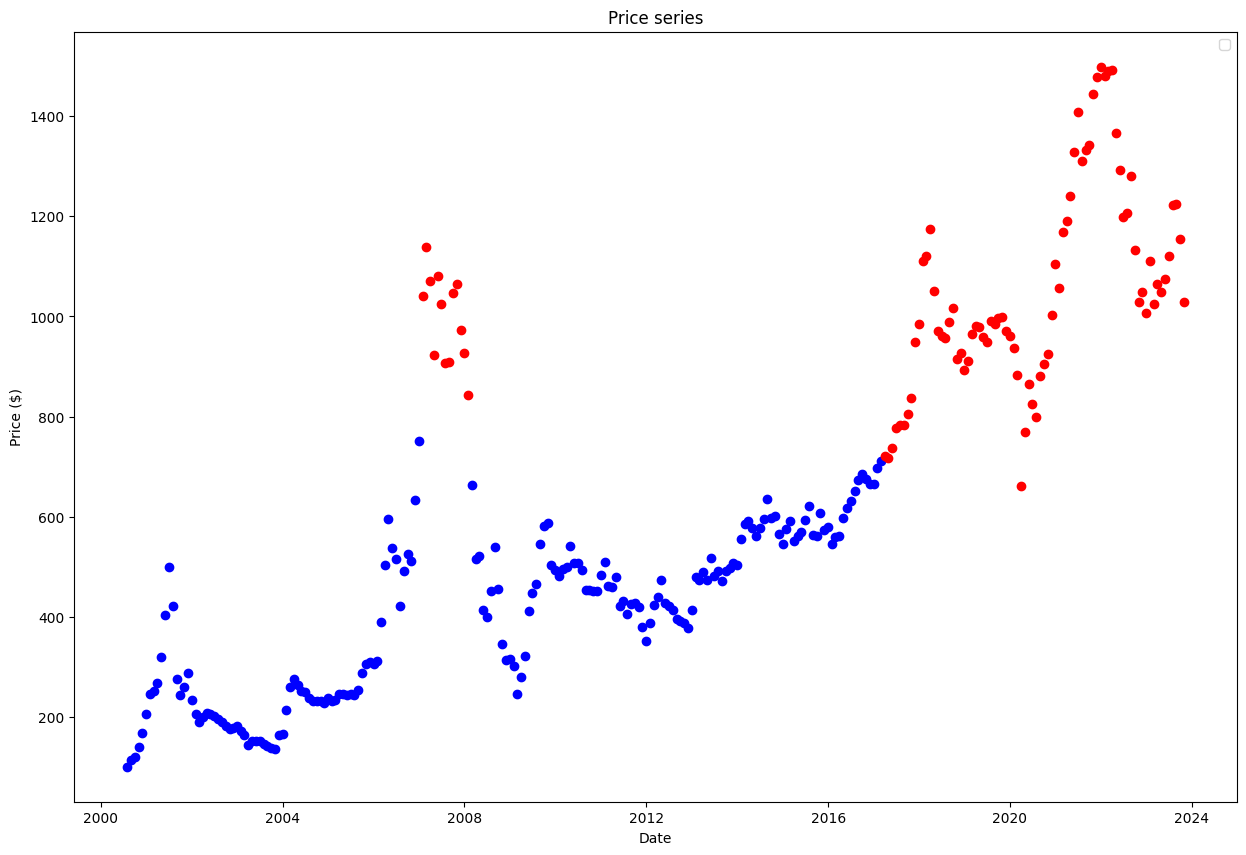

In [18]:
plot_cluster(vn)

In [16]:
vn.head()

,low,high,open,close,adj_close,order_matching_volume,order_matching_value,order_negotiated_volume,order_negotiated_value,us_yield_spread,states
date,,,,,,,,,,,
2000-07-31,101.55,101.55,101.55,101.55,101.55,14500,2.472900e+08,0,0,-0.09,0
2000-08-31,115.15,115.15,115.15,115.15,115.15,558100,1.087611e+10,0,0,-0.45,0
2000-09-30,120.71,120.71,120.71,120.71,120.71,641700,1.264593e+10,0,0,-0.38,0
2000-10-31,140.84,140.84,140.84,140.84,140.84,669400,1.469980e+10,0,0,-0.55,0
2000-11-30,168.73,168.73,168.73,168.73,168.73,865300,2.313284e+10,0,0,-0.64,0
